# Analysis of Video Games

The online store Ice sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
In front of us is data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

###### Main Goal of the Analysis:

Prediction of the sales, popularity and profitability of the platforms

# Table of Contents

- 1) [Open the data file and study the general information](#1)
<br> <br>
- 2) [Prepare the data](#2)
<br> <br>
    - 2.1) [Replace the column names (make them lowercase)](#2.1)
    - 2.2) [Convert the data types](#2.2)
    - 2.3) [Missing values](#2.3)
    - 2.4) [Total sales for each game](#2.4)
<br> <br>
- 3) [Analysis](#3)
<br> <br>
    - 3.1) [Time Periods of Game Releases](#3.1)
    - 3.2) [Sales on different platforms](#3.2)
    - 3.3) [Take data from certain time period](#3.3) <br>
    - 3.4) [Select profitable platforms](#3.4)
    - 3.5) [Total Sales for Games broken down by platform](#3.5)
    - 3.6) [Reviews affecting Sales on PSV](#3.6)
    - 3.7) [Reviews affecting Sales on other platforms](#3.7)
    - 3.8) [Genres and Sales](#3.8)
<br> <br>
- 4) [Create a user profile for each region](#4)
<br> <br>
    For each region (NA, EU, JP), determine:
    - 4.1) [The top five platforms](#4.1)
    - 4.2) [The top five genres](#4.2)
    - 4.3) [Do ESRB ratings affect sales in individual regions?](#4.3)
<br> <br>
- 5) [Test of hypotheses](#5)
<br> <br>
    - 5.1) [Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.](#5.1)
    - 5.2) [Hypothesis 2: Average user ratings for the Action and Sports genres are different.](#5.2)
<br> <br>    
- 6) [General Conclusion](#6)

<a id="1"></a>

## 1) Open the data file and study the general information

In [1]:
# import libraries
import math
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
from io import StringIO
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# read csv file
try:
    df = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/integrated_1_games.csv')
except:
    print("Couldn't read csv file.")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusion

We have a table with 16715 rows and 11 columns. <br>
Every row stands for a certain game on a certain platform. Besides the game's name, platform and year of release, the row also gives information about the sales in Europe, North America, Japan and the rest regions and its rating in three different kinds (Critic_Score with a maximum of 100, User_Score with a maximum of 10 and age rating in ESRB format). The units of the sales is million US Dollars. <br>
The columns Name and Platform only have two missing values. The year of release is missing over 250 times and the three different ratings have many thousands of missing values. <br>
The data types don't always make sense like the one from the User_Score.

<a id="2"></a>

## 2) Prepare the data

<a id="2.1"></a>

### 2.1) Replace the column names (make them lowercase)

In [5]:
df.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', \
             'user_score', 'rating']

df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="2.2"></a>

### 2.2) Convert the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
year            16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# check for duplicates

print(df.duplicated().sum())

0


In [8]:
# function for checking how many integers in a column are

def test_if_int(column):
    number_of_not_integers = 0
    for number in column:
        is_integer = number.is_integer()
        if is_integer == False and number == number:
            number_of_not_integers += 1
    return number_of_not_integers

In [9]:
print("Number of rows with 'year' not as integer:", test_if_int(df['year']))

# They are all integers, so let's transform them into int data type
try:
    df['year'] = df['year'].astype('Int64')
except:
    print("Couldn't tranform 'year' to int.")

Number of rows with 'year' not as integer: 0


In [10]:
# Check if critic scores are always integers
# use that function

print("Number of rows with 'critic_score' not as integer:", test_if_int(df['critic_score']))

Number of rows with 'critic_score' not as integer: 0


In [11]:
# Transform critic scores to float data type

try:
    df['critic_score'] = df['critic_score'].astype('float')
except:
    print("Couldn't transform critic scores into float data type.")

In [12]:
# While converting the user score objects to floats, I got the ValueError: "could not convert string to float: 'tbd'"


# Let's see how many of them we have
print("Number of rows with 'tbd' as user score:", len(df.query('user_score == "tbd"')))
print()


# These values don't give information about the user score; they behave like missing values
# I will replace them with NaN values
# transform the user scores from objects to float numbers

for i in df.index:
    if df.loc[i, 'user_score'] == 'tbd':
        df.loc[i, 'user_score'] = math.nan

try:
    df['user_score'] = df['user_score'].astype('float')
except:
    print("Couldn't transform user scores into float data type.")

Number of rows with 'tbd' as user score: 2424



In [13]:
# Tranform Sales into float data type
try:
    df['eu_sales'] = df['eu_sales'].astype('float')
except:
    print("Couldn't transform eu sales into float.")
try:
    df['na_sales'] = df['na_sales'].astype('float')
except:
    print("Couldn't transform na sales into float.")
try:
    df['jp_sales'] = df['jp_sales'].astype('float')
except:
    print("Couldn't transform jp sales into float.")
try:
    df['other_sales'] = df['other_sales'].astype('float')
except:
    print("Couldn't transform other sales into float.")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
year            16446 non-null Int64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    8137 non-null float64
user_score      7590 non-null float64
rating          9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Conclusion

The years of release have been transformed into integer data type since half years don't make sense here. <br>
The critic scores are always integers, so I transformed this column also to integer data type. <br>
The user scores are objects but should be numbers up to 10. While I transformed the strings into floats, I got the helping ValueError that 'tbd' couldn't be transformed. Since 'tbd' means 'to be determined' these values are like missing values, so I changed them to missing values. After that, I could transform this column into float data type. <br> 
The transformations between million US Dollars and thousand US Dollars can easily be done in the analysis with the factor of 1000. Since there were no missing values and since we didn't lose any small number by rounding the sales by three digits, the transformations to int data types of the sales were successful (there couldn't be any sales found that are not integers after the multiplication by the factor 1000). <br>
The reason for being able to do these transformations is that transformations including the translation of all values by a certain value and including the multiplication of all values by a certain value are linear, so correlation coefficients won't change (properties of linearity).

<a id="2.3"></a>

### 2.3) Missing values

#### Column 'name'

In [15]:
# rows with missing names
print(df[df['name'].isna()])
print()

print("These rows are also the two rows with missing genres.")
print("In generell, these two rows have many missing information.")
print("Since the quote of rows with missing names and genres is very small (2/16715) I delete them.")
print()

# delete these two rows
df = df.drop([659, 14244])

# reset index
df = df.reset_index(drop=True)

df.info()

      name platform  year genre  na_sales  eu_sales  jp_sales  other_sales  \
659    NaN      GEN  1993   NaN      1.78      0.53      0.00         0.08   
14244  NaN      GEN  1993   NaN      0.00      0.00      0.03         0.00   

       critic_score  user_score rating  
659             NaN         NaN    NaN  
14244           NaN         NaN    NaN  

These rows are also the two rows with missing genres.
In generell, these two rows have many missing information.
Since the quote of rows with missing names and genres is very small (2/16715) I delete them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16444 non-null Int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    81

#### Column 'year'

In [16]:
print("I want to see how the missing values for years of release are distributed on certain platforms.")

# create pivot table for counting the total number of games for every platform
pivot_year = df.pivot_table(index='platform', values='name', aggfunc ='count')
pivot_year.columns = ['number_of_games']

# add columns in order to see how big the quote of missing years of release is
for pf in pivot_year.index:
    pivot_year.loc[pf, 'counts_missing_years'] = len(df[(df['platform'] == pf)&(df['year'].isna())])
    pivot_year.loc[pf, 'percentage_missing_years'] = 100*len(df[(df['platform'] == pf)&(df['year'].isna())]) / \
                                                    len(df[df['platform'] == pf])

# sort table by quote column in order to see the platforms with the biggest missing quotes
pivot_year = pivot_year.sort_values('percentage_missing_years', ascending=False)
    
# For a better view on the table
pivot_year['counts_missing_years'] = pivot_year['counts_missing_years'].apply("{:.0f}".format)
pivot_year['percentage_missing_years'] = pivot_year['percentage_missing_years'].apply("{:.1f}".format)

I want to see how the missing values for years of release are distributed on certain platforms.


In [17]:
pivot_year

,number_of_games,counts_missing_years,percentage_missing_years
platform,,,
2600,133,17,12.8
Wii,1320,34,2.6
XB,824,21,2.5
GC,556,14,2.5
X360,1262,30,2.4
PS3,1331,25,1.9
PC,974,17,1.7
PS2,2161,34,1.6
3DS,520,8,1.5


In [18]:
print("Let's see the maximum and the minimum for years at the platform with the highest missing quote: '2600'.")
print()
print("Highest year for '2600' platform:", df[df['platform'] == '2600']['year'].max())
print("Lowest year for '2600' platform:", df[df['platform'] == '2600']['year'].min())

Let's see the maximum and the minimum for years at the platform with the highest missing quote: '2600'.

Highest year for '2600' platform: 1989
Lowest year for '2600' platform: 1980


##### Conclusion

The column 'name' had two missing game names with anyway many missing informations. So, these two rows have been deleted. <br>
I observed that overall the missing values for the column 'year' are distributed over many platforms; the biggest quote (12.8%) for missing values is given for the platform '2600' which only has 133 games in total in our table. The second biggest quote is much smaller (2.6%) and the platform '2600' is a platform from the 80s'. Since our goal is a prediction for 2017 I decided to not fill in missing values for 'years'.

#### Column 'rating'

In [19]:
##### check for other rating values

# list of ratings regarding the possible ratings from wikipedia:
ratings = ['eC', 'E', 'E10+', 'T', 'M', 'AO', 'RP']


# let's compare the number of ratings
print("Length of df with given ratings:", len(df) - len(df[df['rating'].isna()]))
print()
print("Length of df with ratings regarding the possible ratings from wikipedia:", len(df.query('rating == @ratings')))
print()
print("There is a difference of", abs(len(df) - len(df[df['rating'].isna()]) - len(df.query('rating == @ratings'))), "rows.")
print()


# Show these four different rows
print(df.query('rating != @ratings and rating == rating'))
print()
print("These three 'K - A' ratings can't be dedicated to possible ratings, so these ratings will be changed to missing values.")
print()


# fill three rows with NaN
df.loc[656, 'rating'] = math.nan
df.loc[902, 'rating'] = math.nan
df.loc[16679, 'rating'] = math.nan

# change 'EC' to 'eC'
for i in df.index:
    if df.loc[i, 'rating'] == 'EC':
        df.loc[i, 'rating'] = 'eC'

# check if these three ratings were replaced successfully
print("Let's check if these three ratings were replaced successfully:")
print()
print(df.loc[[656, 902, 16679]])

Length of df with given ratings: 9949

Length of df with ratings regarding the possible ratings from wikipedia: 9938

There is a difference of 11 rows.

                                                  name platform  year  \
656                                     Theme Hospital       PC  1997   
902                                 PaRappa The Rapper       PS  1996   
4296                         Nickelodeon Team Umizoomi       DS  2011   
5033          Sesame Street: Elmo's A-to-Zoo Adventure      Wii  2010   
6045         Sesame Street: Cookie's Counting Carnival      Wii  2010   
6763   Dora the Explorer: Journey to the Purple Planet      PS2  2005   
7585           Ni Hao, Kai-lan: New Year's Celebration       DS  2009   
9959   Dora the Explorer: Journey to the Purple Planet       GC  2005   
13064        Sesame Street: Cookie's Counting Carnival       PC  2010   
13454         Sesame Street: Elmo's A-to-Zoo Adventure       PC  2010   
16679                                       

##### Check for patterns

In [20]:
print("Value counts for rated games in df:")
print()
print(df['rating'].value_counts())

Value counts for rated games in df:

E       3990
T       2961
M       1563
E10+    1420
eC         8
RP         3
AO         1
Name: rating, dtype: int64


In [21]:
print("Relation between quote of missing ratings and platforms:")

# create pivot table for counting the total number of games for every platform
pivot_rating = df.pivot_table(index='platform', values='name', aggfunc ='count')
pivot_rating.columns = ['number_of_games']

# add columns in order to see how big the quote of missing ratings is
# also add columns with the years of newest and oldest games released
for pf in pivot_rating.index:
    pivot_rating.loc[pf, 'counts_missing_ratings'] = len(df[(df['platform'] == pf)&(df['rating'].isna())])
    pivot_rating.loc[pf, 'percentage_missing_ratings'] = 100*len(df[(df['platform'] == pf)&(df['rating'].isna())]) / \
                                                    len(df[df['platform'] == pf])
    pivot_rating.loc[pf, 'minimum_year'] = df[df['platform'] == pf]['year'].min()
    pivot_rating.loc[pf, 'maximum_year'] = df[df['platform'] == pf]['year'].max()

# sort table by year column in order to see the platforms with the newest games
pivot_rating = pivot_rating.sort_values('maximum_year', ascending=False)
    
# For a better view on the table
pivot_rating['counts_missing_ratings'] = pivot_rating['counts_missing_ratings'].apply("{:.0f}".format)
pivot_rating['percentage_missing_ratings'] = pivot_rating['percentage_missing_ratings'].apply("{:.0f}".format)
pivot_rating['minimum_year'] = pivot_rating['minimum_year'].apply("{:.0f}".format)
pivot_rating['maximum_year'] = pivot_rating['maximum_year'].apply("{:.0f}".format)

Relation between quote of missing ratings and platforms:


In [22]:
pivot_rating

,number_of_games,counts_missing_ratings,percentage_missing_ratings,minimum_year,maximum_year
platform,,,,,
XOne,247,61,25,2013,2016
3DS,520,292,56,2011,2016
X360,1262,210,17,2005,2016
WiiU,147,42,29,2012,2016
Wii,1320,318,24,2006,2016
PSV,430,279,65,2011,2016
PC,974,202,21,1985,2016
PS4,392,137,35,2013,2016
PS3,1331,379,28,2006,2016


In [23]:
# We replace the missing ratings with the indicator 'undefined'

for i in df.index:
    if df.loc[i, 'rating'] != df.loc[i, 'rating']:
        df.loc[i, 'rating'] = 'undefined'
        
print("Value counts after replacing missing ratings with 'undefined':")
print()
print(df['rating'].value_counts())

Value counts after replacing missing ratings with 'undefined':

undefined    6767
E            3990
T            2961
M            1563
E10+         1420
eC              8
RP              3
AO              1
Name: rating, dtype: int64


##### Conclusion

For a prediction, games that had their last game released before 2011 I consider to be not relevant. This means in the table we look at the platforms PS2 and above. In that section of the table, the biggest missing quotes are for 'PSV' (65%), '3DS' (56%) and for 'PSP' (55%). These platforms have 430, 520 and 1209 games in the table. The value counts for ratings show that the ratings 'AO', 'RP' and 'eC' have very low counts in the whole table. I consider the number of rated games for every of the three platforms to be enough for being representative since there are only 4 different ratings with many thousands of counts in the whole table. In the table above, we can see that old platforms had no ESRB ratings; that doesn't matter since we will concentrate on current platforms for our analysis. The missing ratings have been replaced with the indicator 'undefined'.

#### Column 'critic_score'

In [24]:
print("Range of critic scores:", df['critic_score'].min(), "-", df['critic_score'].max())

Range of critic scores: 13.0 - 98.0


##### Check for patterns

In [25]:
print("Relation between quote of missing critic scores and platforms:")
# create pivot table for counting the total number of games for every platform
pivot_critic = df.pivot_table(index='platform', values='name', aggfunc ='count')
pivot_critic.columns = ['number_of_games']

# add columns in order to see how big the quote of missing ratings is
for pf in pivot_critic.index:
    pivot_critic.loc[pf, 'counts_missing_scores'] = len(df[(df['platform'] == pf)&(df['critic_score'].isna())])
    pivot_critic.loc[pf, 'percentage_missing_scores'] = 100*len(df[(df['platform'] == pf)&(df['critic_score'].isna())]) / \
                                                    len(df[df['platform'] == pf])
    pivot_critic.loc[pf, 'minimum_year'] = df[df['platform'] == pf]['year'].min()
    pivot_critic.loc[pf, 'maximum_year'] = df[df['platform'] == pf]['year'].max()

# sort table by year column in order to see the platforms with the newest games
pivot_critic = pivot_critic.sort_values('maximum_year', ascending=False)
    
# For a better view on the table
pivot_critic['counts_missing_scores'] = pivot_critic['counts_missing_scores'].apply("{:.0f}".format)
pivot_critic['percentage_missing_scores'] = pivot_critic['percentage_missing_scores'].apply("{:.0f}".format)
pivot_critic['minimum_year'] = pivot_critic['minimum_year'].apply("{:.0f}".format)
pivot_critic['maximum_year'] = pivot_critic['maximum_year'].apply("{:.0f}".format)

Relation between quote of missing critic scores and platforms:


In [26]:
pivot_critic

,number_of_games,counts_missing_scores,percentage_missing_scores,minimum_year,maximum_year
platform,,,,,
XOne,247,78,32,2013,2016
3DS,520,352,68,2011,2016
X360,1262,346,27,2005,2016
WiiU,147,57,39,2012,2016
Wii,1320,735,56,2006,2016
PSV,430,310,72,2011,2016
PC,974,259,27,1985,2016
PS4,392,140,36,2013,2016
PS3,1331,511,38,2006,2016


##### Conclusion

Here we have similar observations as we had when finding patterns for ratings: <br>
The old platforms have no critic scores and for the newer ones, there are some platforms with high missing quotes (72% for PSV), but there are still enough scored games for the newer platforms to be representative.

#### Column 'user_score'

In [27]:
print("Range of user scores:", df['user_score'].min(), "-", df['user_score'].max())

Range of user scores: 0.0 - 9.7


##### Check for patterns

In [28]:
print("Relation between quote of missing user scores and platforms:")
# create pivot table for counting the total number of games for every platform
pivot_user = df.pivot_table(index='platform', values='name', aggfunc ='count')
pivot_user.columns = ['number_of_games']

# add columns in order to see how big the quote of missing ratings is
for pf in pivot_user.index:
    pivot_user.loc[pf, 'counts_missing_scores'] = len(df[(df['platform'] == pf)&(df['user_score'].isna())])
    pivot_user.loc[pf, 'percentage_missing_scores'] = 100*len(df[(df['platform'] == pf)&(df['user_score'].isna())]) / \
                                                    len(df[df['platform'] == pf])
    pivot_user.loc[pf, 'minimum_year'] = df[df['platform'] == pf]['year'].min()
    pivot_user.loc[pf, 'maximum_year'] = df[df['platform'] == pf]['year'].max()

# sort table by year column in order to see the platforms with the newest games
pivot_user = pivot_user.sort_values('maximum_year', ascending=False)
    
# For a better view on the table
pivot_user['counts_missing_scores'] = pivot_user['counts_missing_scores'].apply("{:.0f}".format)
pivot_user['percentage_missing_scores'] = pivot_user['percentage_missing_scores'].apply("{:.0f}".format)
pivot_user['minimum_year'] = pivot_user['minimum_year'].apply("{:.0f}".format)
pivot_user['maximum_year'] = pivot_user['maximum_year'].apply("{:.0f}".format)

Relation between quote of missing user scores and platforms:


In [29]:
pivot_user

,number_of_games,counts_missing_scores,percentage_missing_scores,minimum_year,maximum_year
platform,,,,,
XOne,247,65,26,2013,2016
3DS,520,346,67,2011,2016
X360,1262,296,23,2005,2016
WiiU,147,47,32,2012,2016
Wii,1320,760,58,2006,2016
PSV,430,287,67,2011,2016
PC,974,204,21,1985,2016
PS4,392,135,34,2013,2016
PS3,1331,454,34,2006,2016


##### Conclusion

Here the observations recur: Old platforms have no scores and for the newer platforms we can say that there are enough socred games.

In [30]:
print("Check for duplicates:")
print()

df_short = df[['name', 'platform', 'year', 'genre']]
print(df_short[df_short.duplicated()])
print()
print(df.query('name == "Madden NFL 13" and platform == "PS3"'))
print()
print("I will delete the one row with almost zero sales.")

df = df.drop(index = 16228)

Check for duplicates:

                name platform  year   genre
16228  Madden NFL 13      PS3  2012  Sports

                name platform  year   genre  na_sales  eu_sales  jp_sales  \
604    Madden NFL 13      PS3  2012  Sports      2.11      0.22       0.0   
16228  Madden NFL 13      PS3  2012  Sports      0.00      0.01       0.0   

       other_sales  critic_score  user_score rating  
604           0.23          83.0         5.5      E  
16228         0.00          83.0         5.5      E  

I will delete the one row with almost zero sales.


#### Conclusion

In the first try I tried to fill in all missing values in my table. In the second try, I want to do the analysis without filling any missing values to see the differences. Since I will focus on newer platforms, it can be a disadvantage to fill in missing years as it may be possible that older games will be integrated in the analysis. Our table has a very high quote of missing ratings, missing user scores and missing critic scores, so on the one hand, there may be some kind of signal for the missing values (so I replaced all missing values in 'rating' with 'undefined' indicator) and on the other hand, the techniques for filling in missing values would be too inaccurate.

<a id="2.4"></a>

### 2.4) Total sales for each game

Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [31]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 12 columns):
name            16712 non-null object
platform        16712 non-null object
year            16443 non-null Int64
genre           16712 non-null object
na_sales        16712 non-null float64
eu_sales        16712 non-null float64
jp_sales        16712 non-null float64
other_sales     16712 non-null float64
critic_score    8136 non-null float64
user_score      7589 non-null float64
rating          16712 non-null object
total_sales     16712 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


<a id="3"></a>

## 3) Analysis

<a id="3.1"></a>

### 3.1) Time Periods of Game Releases

Look at how many games were released in different years. Is the data for every period significant?

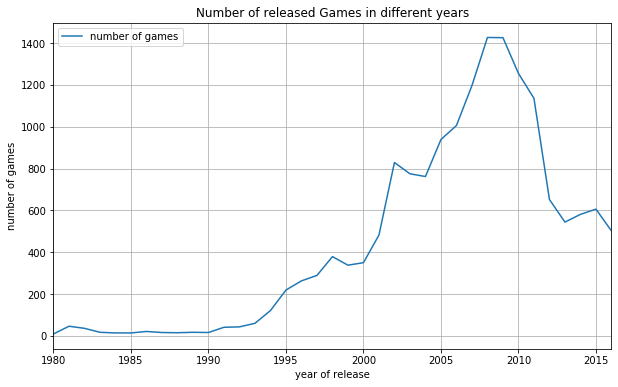

In [33]:
# create pivot table wiht years as index
df_year_games = df.pivot_table(index='year', values='name', aggfunc='count')
df_year_games.columns = ['number of games']

df_year_games.plot(grid=True, figsize = (10, 6))
plt.title('Number of released Games in different years')
plt.xlabel('year of release')
plt.ylabel('number of games')
plt.show()

#### Conclusion

Our data shows a little increase right after the beginning of 1980. This increase falls down to a constant level until 1990. From there on, one can observe a increasing trend so that five years later, 1995, we had approx. eleven times more games released compared to 1990. Overall, this increasing trend continues overall linear until we reach the year with the most games released: 2009. This trend of course has small increasing and decreasing periods but is overall linear. At 2009 there were ca. 1500 games released. After that, there was a strong decreasing trend until 2013 where not even half as much games were released as 2009. From there on, there is a stagnating trend until 2016 with a strong decreasing trend from 2015 to 2016.

<a id="3.2"></a>

### 3.2) Sales on different platforms

Look at how sales varied from platform to platform. <br> Choose the platforms with the greatest total sales and build a distribution based on data for each year. <br> Find platforms that used to be popular but now have zero sales. <br> How long does it generally take for new platforms to appear and old ones to fade?

#### Video Game Sales By Platform and Region

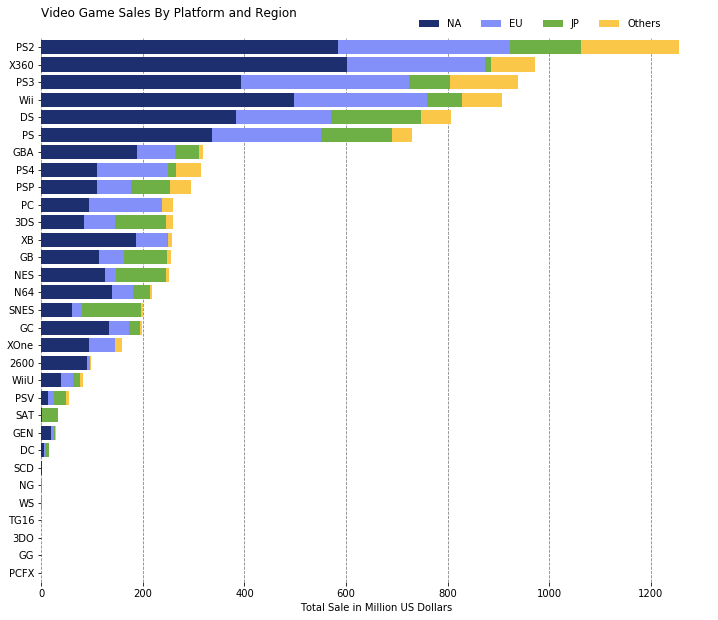

In [34]:
# create table for grouping the different sales by platforms
df_grouped = df.groupby('platform')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
df_grouped = df_grouped.sort_values('total_sales')


fields = ['na_sales','eu_sales','jp_sales','other_sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']


# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))


# plot bars
left = len(df_grouped) * [0]

for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]

    
# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total Sale in Million US Dollars')


# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

#### Conclusion

In the graphic one can see that the total sales vary extremly from platform to platform. Also the distribution for sales in different areas vary; for example: SNES has more than 50% sales in Japan while XBOX360 has nearly no sales in Japan. <br>
There is a big cut in the total sales at GBA and PS: The sorted table more than doubles from one platform to the next platform its total sale. There is also a big increase from the second largest to the most largest total saled platform: XBOX360 and PS2. <br> So one can say that in perspective of total sales, there is obviously a leader platform. It's remarkable that some platforms have so less revenue that the bar can't even be seen on the graphic.

#### Total Sales of the four most successful platforms in time

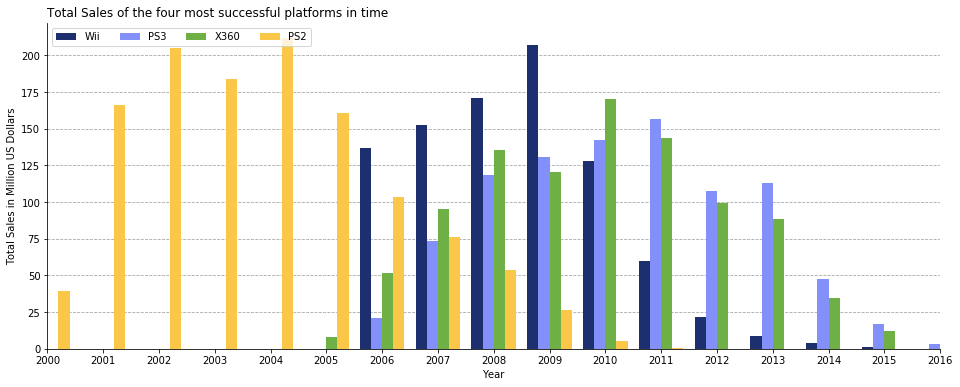

In [35]:
# We choose the four platforms with the biggest total sales
biggest_pf = ['Wii', 'PS3', 'X360', 'PS2']


# create four helping columns for grouping
for i in df.index:
    for pf in biggest_pf:
        if df.loc[i, 'platform'] == pf:
            df.loc[i, pf] = df.loc[i, 'total_sales']
    

# group by year and have four columns with the refered platforms with the total sales as values
df_pf_years = df.groupby('year')[['Wii', 'PS3', 'X360', 'PS2']].sum()


# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))


# numerical x
x = np.arange(0, len(df_pf_years.index))


# plot bars
plt.bar(x - 0.3, df_pf_years['Wii'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_pf_years['PS3'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_pf_years['X360'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_pf_years['PS2'], width = 0.2, color = '#FAC748')


# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# x y details
plt.ylabel('Total Sales in Million US Dollars')
plt.xlabel('Year')
plt.xticks(x, df_pf_years.index)
plt.xlim(left=20, right=36)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)


# title and legend
plt.title('Total Sales of the four most successful platforms in time', loc ='left')
plt.legend(['Wii', 'PS3', 'X360', 'PS2'], loc='upper left', ncol = 4)
plt.show()

#### Conclusion

That the PS2 now has zero sales is clear since it's the earliest released platform within these four. Also the Wii has now zero sales, but it started its sales in the same year as X360 and PS3; only the PS3 now has still sales as one can see at 2016. <br>
Interestingly the Wii has a huge start in the total sales right in the year of release; even though it started in november 2016 in the US. That means this huge revenue was taken in november and december 2016. I think one factor is that many families bought this platform as christmas present. <br> <br> These four platforms have along the graphic: <br>
PS2: 1st revenue at 2000; last revenue at 2011. <br>
Wii: 1st revenue at 2006; last revenue at 2015. <br>
X360: 1st revenue at 2005; last revenue at 2015. <br>
PS3: 1st revenue at 2006; last revenue at 2016. <br>
So, in generell for popular platforms the time period between appearance and fading is approx. 9 - 11 years.

<a id="3.3"></a>

### 3.3) Take Data from certain time period

In [36]:
print("Let's see when the new platforms were released:")

# create pivot table for counting the total number of games for every platform
pivot_years = df.pivot_table(index='platform', values='name', aggfunc ='count')
pivot_years.columns = ['number_of_games']

# add columns in order to see the lowest and highest years for games released
for pf in pivot_years.index:
    pivot_years.loc[pf, 'minimum_year'] = df[df['platform'] == pf]['year'].min()
    pivot_years.loc[pf, 'maximum_year'] = df[df['platform'] == pf]['year'].max()

# sort table by year column in order to see the newest platforms
pivot_years = pivot_years.sort_values('minimum_year', ascending=False)
    
# For a better view on the table
pivot_years['minimum_year'] = pivot_years['minimum_year'].apply("{:.0f}".format)
pivot_years['maximum_year'] = pivot_years['maximum_year'].apply("{:.0f}".format)

Let's see when the new platforms were released:


In [37]:
pivot_years

,number_of_games,minimum_year,maximum_year
platform,,,
XOne,247,2013,2016
PS4,392,2013,2016
WiiU,147,2012,2016
3DS,520,2011,2016
PSV,430,2011,2016
PS3,1330,2006,2016
Wii,1320,2006,2016
X360,1262,2005,2016
PSP,1209,2004,2015


Determine what period you should take data for. <br> To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

In [38]:
df_sorted = df[df['year'] >= 2013]

#### Conclusion

Regarding the graphic in section 'Time Periods of Game Releases', overall there is a decreasing trend in the number of released games per year beginning at 2009. This decreasing trend ended in 2013 an began to increase again. In the graphic above ('Total Sales of the four most successful platforms in time') one can see that the platforms with the highest total sales are now less relevant. The table above shows us that the two newest platforms are XOne and PS4 with the oldest games released in 2013. When choosing 2013 as lower border for our time period, we would include all informations about these two new platforms. When choosing 2013 as lower border, we would also include many other platforms since many of them have still games released in 2016. So, 2013 will be chosen as lower border.

<a id="3.4"></a>

### 3.4) Select profitable platforms

Which platforms are leading in sales? Which ones are growing or shrinking? <br> Select several potentially profitable platforms.

#### Game Releases

In [39]:
# We need to find those platforms with an increasing trend of game releases and total sales in 2016.
# We also need to find those platforms leading in total sales and game releases in 2016.


# Game releases:

df_games = df_sorted.pivot_table(index = 'platform', values = 'name', columns='year', aggfunc = 'count')

print("Number of different platforms:", len(df_sorted['platform'].unique()))
print()
print("List of these platforms:")
print()
print(df['platform'].unique())

Number of different platforms: 11

List of these platforms:

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [40]:
df_games.sort_values(2016, ascending=False)
print("The platform releasing the most games in 2013 is:", df_games[2013].idxmax())
print("The platform releasing the most games in 2014 is:", df_games[2014].idxmax())
print("The platform releasing the most games in 2015 is:", df_games[2015].idxmax())
print("The platform releasing the most games in 2016 is:", df_games[2016].idxmax())

The platform releasing the most games in 2013 is: PS3
The platform releasing the most games in 2014 is: PS3
The platform releasing the most games in 2015 is: PS4
The platform releasing the most games in 2016 is: PS4


In [41]:
df_games.sort_values(2016, ascending = False).head()

year,2013,2014,2015,2016
platform,,,,
PS4,16.0,75.0,137.0,164.0
XOne,19.0,61.0,80.0,87.0
PSV,63.0,100.0,110.0,85.0
PC,38.0,47.0,50.0,54.0
3DS,91.0,80.0,86.0,46.0


In [42]:
# for every platform we calculate the quote of increasing game releases 2014 compared to 2013 and 2015 compared to 2014
# and 2016 compared to 2015

# for that we create helping columns in our sorted DataFrame:
# '2013-2014 / percent', '2014-2015 / percent', '2015-2016 / percent'

for pf in df_games.index:
    df_games.loc[pf, '2013-2014 /percent'] = (100 * df_games.loc[pf, 2014] / df_games.loc[pf, 2013] - 100).round(1)
    df_games.loc[pf, '2014-2015 /percent'] = (100 * df_games.loc[pf, 2015] / df_games.loc[pf, 2014] - 100).round(1)
    df_games.loc[pf, '2015-2016 /percent'] = (100 * df_games.loc[pf, 2016] / df_games.loc[pf, 2015] - 100).round(1)

df_games[2013] = df_games[2013].apply("{:.0f}".format)
df_games[2014] = df_games[2014].apply("{:.0f}".format)
df_games[2015] = df_games[2015].apply("{:.0f}".format)
df_games[2016] = df_games[2016].apply("{:.0f}".format)

In [43]:
df_games.sort_values('2013-2014 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PS4,16,75,137,164,368.8,82.7,19.7
XOne,19,61,80,87,221.1,31.1,8.8
PSV,63,100,110,85,58.7,10.0,-22.7
PC,38,47,50,54,23.7,6.4,8.0
3DS,91,80,86,46,-12.1,7.5,-46.5


In [44]:
df_games.sort_values('2014-2015 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PS4,16,75,137,164,368.8,82.7,19.7
XOne,19,61,80,87,221.1,31.1,8.8
PSV,63,100,110,85,58.7,10.0,-22.7
3DS,91,80,86,46,-12.1,7.5,-46.5
PC,38,47,50,54,23.7,6.4,8.0


In [45]:
df_games.sort_values('2015-2016 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PS4,16,75,137,164,368.8,82.7,19.7
XOne,19,61,80,87,221.1,31.1,8.8
PC,38,47,50,54,23.7,6.4,8.0
PSV,63,100,110,85,58.7,10.0,-22.7
3DS,91,80,86,46,-12.1,7.5,-46.5


#### Conclusion

In the top 5 of game releasing platforms there are always the same four platforms for the compared years: <br>
PS4, XOne, PSV and PC. <br> In 2013 - 2014 comparison there was also the PS3 the top five, but with an increasing trend; it's fading away because of its follower, the PS4. In the next compared years, the Top 5 were equal; the 3DS joins to the existing top four others. But as one can see: The 3DS has improved his sales from 2014 to 2015 a bit with 7.5%, but failed his sales from 2015 to 2016 with -46.5%. Also the PSV has a strong decreasing trend with -22.7%. The PC has a slightly but constant increasing trend of 6.4 - 8% since 2014. The XOne had from 2013 to 2014 a massive start with over 221 %, but this kind of increase begins to stagnate gradually. The PS4 has the strongest increasing trend in 2016 compared to 2015 with approx. 20%.

#### Total Sales

In [46]:
df_sales = df_sorted.pivot_table(index = 'platform', values = 'total_sales', columns='year', aggfunc = 'sum')

df_sales.sort_values(2016, ascending=False).head()

year,2013,2014,2015,2016
platform,,,,
PS4,25.99,100.00,118.90,69.25
XOne,18.96,54.07,60.14,26.15
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
WiiU,21.65,22.03,16.35,4.60


In [47]:
print("The platform with the biggest revenue in 2013 is:", df_sales[2013].idxmax())
print("The platform with the biggest revenue in 2014 is:", df_sales[2014].idxmax())
print("The platform with the biggest revenue in 2015 is:", df_sales[2015].idxmax())
print("The platform with the biggest revenue in 2016 is:", df_sales[2016].idxmax())

The platform with the biggest revenue in 2013 is: PS3
The platform with the biggest revenue in 2014 is: PS4
The platform with the biggest revenue in 2015 is: PS4
The platform with the biggest revenue in 2016 is: PS4


In [48]:
# for every platform we calculate the quote of increasing total sales 2014 compared to 2013 and 2015 compared to 2014
# and 2016 compared to 2015

# for that we create helping columns in our sorted DataFrame:
# '2013-2014 / percent', '2014-2015 / percent', '2015-2016 / percent'

for pf in df_sales.index:
    df_sales.loc[pf, '2013-2014 /percent'] = (100 * df_sales.loc[pf, 2014] / df_sales.loc[pf, 2013] - 100).round(1)
    df_sales.loc[pf, '2014-2015 /percent'] = (100 * df_sales.loc[pf, 2015] / df_sales.loc[pf, 2014] - 100).round(1)
    df_sales.loc[pf, '2015-2016 /percent'] = (100 * df_sales.loc[pf, 2016] / df_sales.loc[pf, 2015] - 100).round(1)

In [49]:
df_sales.sort_values('2013-2014 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PS4,25.99,100.00,118.90,69.25,284.8,18.9,-41.8
XOne,18.96,54.07,60.14,26.15,185.2,11.2,-56.5
PSV,10.59,11.90,6.25,4.25,12.4,-47.5,-32.0
PC,12.38,13.28,8.52,5.25,7.3,-35.8,-38.4
WiiU,21.65,22.03,16.35,4.60,1.8,-25.8,-71.9


In [50]:
df_sales.sort_values('2014-2015 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PS4,25.99,100.00,118.90,69.25,284.8,18.9,-41.8
XOne,18.96,54.07,60.14,26.15,185.2,11.2,-56.5
WiiU,21.65,22.03,16.35,4.60,1.8,-25.8,-71.9
PC,12.38,13.28,8.52,5.25,7.3,-35.8,-38.4
3DS,56.57,43.76,27.78,15.14,-22.6,-36.5,-45.5


In [51]:
df_sales.sort_values('2015-2016 /percent', ascending = False).head()

year,2013,2014,2015,2016,2013-2014 /percent,2014-2015 /percent,2015-2016 /percent
platform,,,,,,,
PSV,10.59,11.90,6.25,4.25,12.4,-47.5,-32.0
PC,12.38,13.28,8.52,5.25,7.3,-35.8,-38.4
PS4,25.99,100.00,118.90,69.25,284.8,18.9,-41.8
3DS,56.57,43.76,27.78,15.14,-22.6,-36.5,-45.5
XOne,18.96,54.07,60.14,26.15,185.2,11.2,-56.5


#### Conclusion

The top five platforms are nearly equivalent to those with the most game releases; here, the WiiU is in the top five. Here one can observe too, that the PS3 is fading and replaced by PS4 since the PS3 is not in the top five any more. From '2014-2015 /percent' and '2015-2016 /percent' the only revenue increasing is the one from the PSV (-48.6% to -32%). The biggest quotes for increasing total sales has the PS4 in the years 2013 and 2015; since 2014 it also has absolutely the biggest total sale of all platforms. From 2015 to 2016, all platforms have decreasing trends in their total sales. One platform that has decreased its trend in the years constantly is the 3DS with negative quotes since 2013 in total sales. <br> <br>
That's why I choose the following platforms as the most profitable ones:
- PSV, since it's the only one that increased its trend from 2014-2015 to 2015-2016 in total sales
- PS4, since it has by far the biggest number of game releases and the biggest absolute total sale in 2016
- XOne, since it has the second largest absolute total sale in 2016 and the decreasing trend from 2014/15 to 2015/16 is smaller than the trend from 2013/14 to 2014/15; the decrease has been decelerated in total sales.
- PC, since it's the only one that increased its trend from 2014-2015 to 2015-2016 in total game releases
- 3DS; this platform has a high quote in total sales for Japan (see section 3.2)

<a id="3.5"></a>

### 3.5) Total Sales for Games broken down by platform

Build a box plot for the global sales of all games, broken down by platform. <br> Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [52]:
# Let's check if we miss some same games caused by uppercase letters:

print("Duplicates for Games:", df_sorted['name'].duplicated().sum())
print("Duplicates for Games when only lowercase letters in game names:", df_sorted['name'].str.lower().duplicated().sum())
print()
print("Uppercase and lowercase letters don't make a difference")

Duplicates for Games: 970
Duplicates for Games when only lowercase letters in game names: 970

Uppercase and lowercase letters don't make a difference


In [53]:
pivot_years

,number_of_games,minimum_year,maximum_year
platform,,,
XOne,247,2013,2016
PS4,392,2013,2016
WiiU,147,2012,2016
3DS,520,2011,2016
PSV,430,2011,2016
PS3,1330,2006,2016
Wii,1320,2006,2016
X360,1262,2005,2016
PSP,1209,2004,2015


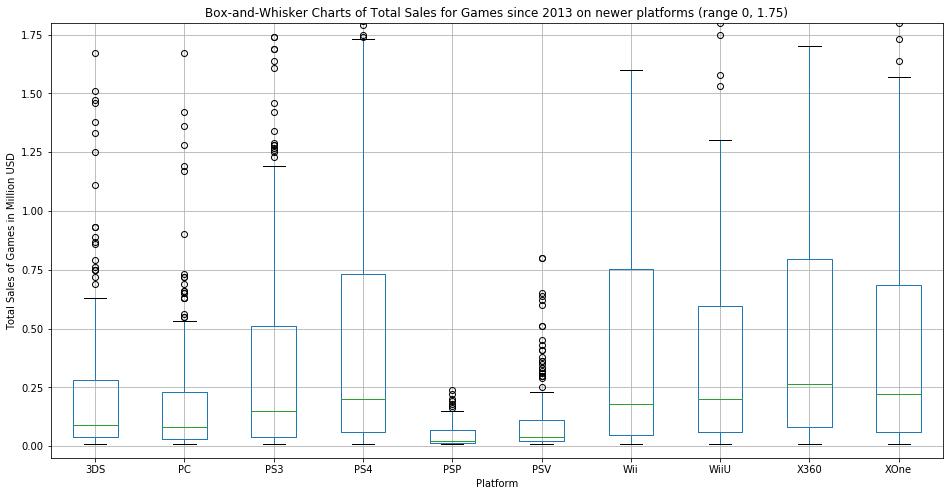

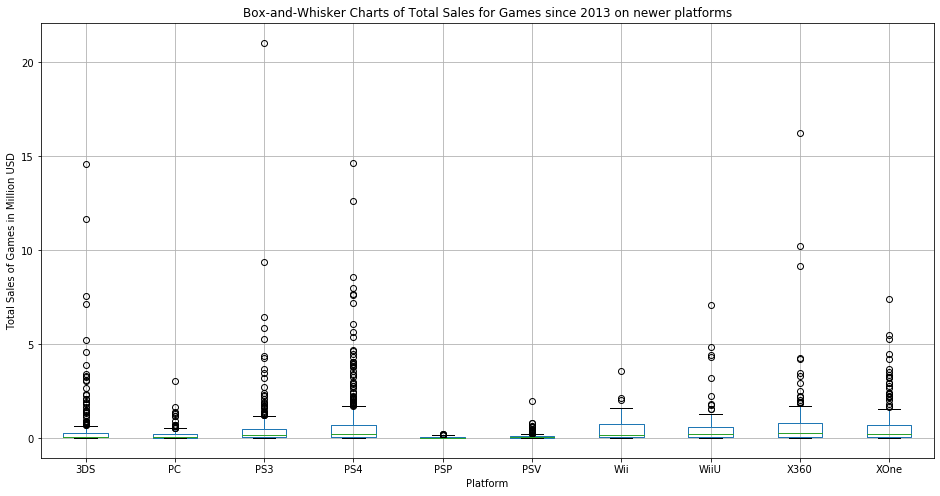

In [54]:
# We include all platforms that have released games since 2015
pf_list = ['3DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne']

# create helping columns in our df_sorted for the Box-and-Whisker Charts
for pf in pf_list:
    for i in df_sorted.index:
        if df_sorted.loc[i, 'platform'] == pf:
            df_sorted.loc[i, pf] = df_sorted.loc[i, 'total_sales']

df_sorted.boxplot(column=pf_list, figsize = (16, 8))
plt.title("Box-and-Whisker Charts of Total Sales for Games since 2013 on newer platforms (range 0, 1.75)")
plt.xlabel('Platform')
plt.ylabel('Total Sales of Games in Million USD')
plt.ylim(-0.05, 1.8)
plt.show()

df_sorted.boxplot(column=pf_list, figsize = (16, 8))
plt.title("Box-and-Whisker Charts of Total Sales for Games since 2013 on newer platforms")
plt.xlabel('Platform')
plt.ylabel('Total Sales of Games in Million USD')
plt.show()

In [55]:
print("Most profitable game for...")
print()
print("3DS: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['3DS'].idxmax(), 'name'], df_sorted['3DS'].max()))
print()
print("PC: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['PC'].idxmax(), 'name'], df_sorted['PC'].max()))
print()
print("PSP: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['PSP'].idxmax(), 'name'], df_sorted['PSP'].max()))
print()
print("PSV: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['PSV'].idxmax(), 'name'], df_sorted['PSV'].max()))
print()
print("Wii: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['Wii'].idxmax(), 'name'], df_sorted['Wii'].max()))
print()
print("WiiU: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['WiiU'].idxmax(), 'name'], df_sorted['WiiU'].max()))
print()
print("PS3: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['PS3'].idxmax(), 'name'], df_sorted['PS3'].max()))
print()
print("X360: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['X360'].idxmax(), 'name'], df_sorted['X360'].max()))
print()
print("PS4: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['PS4'].idxmax(), 'name'], df_sorted['PS4'].max()))
print()
print("XOne: {} | Total Sale: {:.2f}".format(df_sorted.loc[df_sorted['XOne'].idxmax(), 'name'], df_sorted['XOne'].max()))

Most profitable game for...

3DS: Pokemon X/Pokemon Y | Total Sale: 14.60

PC: The Sims 4 | Total Sale: 3.05

PSP: God Eater 2 | Total Sale: 0.24

PSV: Minecraft | Total Sale: 1.96

Wii: Just Dance 2014 | Total Sale: 3.58

WiiU: Mario Kart 8 | Total Sale: 7.09

PS3: Grand Theft Auto V | Total Sale: 21.05

X360: Grand Theft Auto V | Total Sale: 16.27

PS4: Call of Duty: Black Ops 3 | Total Sale: 14.63

XOne: Call of Duty: Black Ops 3 | Total Sale: 7.39


In [56]:
df_sorted = df_sorted.drop(columns = ['3DS','PC','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne', 'PS2'])

In [57]:
df_sorted.query('name == "Grand Theft Auto V" and (platform == "PS3" or platform == "X360")')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


In [58]:
df_sorted.query('name == "Call of Duty: Black Ops 3" and (platform == "PS4" or platform == "XOne")')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,undefined,7.39


In [59]:
df_sorted.query('total_sales > 3.25 and platform == "3DS"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,undefined,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,undefined,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,undefined,5.22
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,undefined,3.44
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,undefined,3.32
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,undefined,3.28


#### Conclusion

The Box-and-Whisker charts show different boxplots for each actual platform. <br>
There we can see that every platform has outliers in the total sales. It is conspicuous that all lower quartiles (25% quartile) are close to the lowest total sale. It also stands out that the upper quartile (75% quartile) is more far away from the median than the lower quartile from the lowest total sale. That means that in generell the distribution for total sales is concentrated for low sales and that there are very few huge outliers - popular games for each platform. The highest total sale varies strongly from platform to platform. For example, even though the Wii and the PS4 have pretty similar lower and upper quartiles, the highest total sale for the PS4 is more than 4 times higher than the one for Wii. The range between the lower and the upper quartile can be divided in two groups: Those with a small range (PSP, PSV, 3DS, PC) and those with a big range. One can observe that 3 of the 4 platforms with a small range are handheld consoles that can be played outside without electrical connections. The 4th platform, the PC, is a special platform since it's the only platform that has existed since the 80s' until today. Since its highest total sale is only about 3 million dollars for games since 2013 one can see that the up-to-date stationary platforms are much more dedicated to have popular games with huge total sales compared to the PC and the handheld platforms. It's conceivable that these up-to-date stationary platforms like XOne or PS4 have many advertisements for popular games. <br> <br>
The five platforms with the highest total sales are: PS3, PS4, X360, XOne and 3DS. <br>
For the 3DS one can see in section 3.2 that the 3DS has a above-average quote of sales in japan. This is mirrored in the sales of its popular games: For example the game 'Monster Hunter X' has a much higher sale in Japan than in other regions. In the table above showing the most saled games for the 3DS, one can see that only 6 games have higher sales in other regions than Japan. <br>
For the most saled games on the other 4 platforms one can see that these games are from 2013 and from 2015. That means that until the end of 2016 there was enough time for the games to accumulate high sales. Even though the platforms XOne and PS4 are the following platforms for PS3 and X360, the precursor platforms PS3 and X360 have both higher total sales. One can also see that the same game 'Call of Duty: Black Ops 3' on PS4 has a total sale that is twice as big as the one on XOne platform (14.6 on PS4, 7.4 on XOne).

<a id="3.6"></a>

### 3.6) Reviews affecting Sales on PSV

Take a look at how user and professional reviews affect sales for one popular platform (you choose). <br> Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

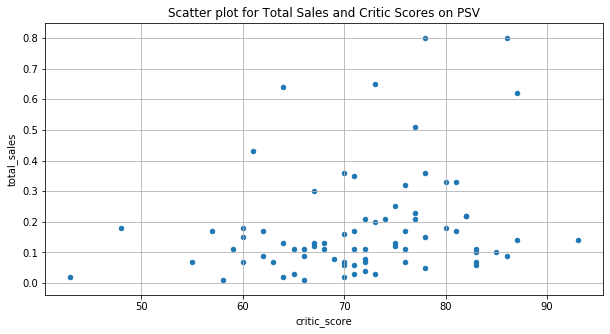

Correlation coefficient between critic_score and total_sales: 0.2540997021864077


In [60]:
#### I choose the PSV

df_psv = df_sorted.query('platform == "PSV" and user_score == user_score and critic_score == critic_score')

# Scatter Plot for critic scores and total sales
df_psv.plot(x='critic_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and Critic Scores on PSV')
plt.show()

print("Correlation coefficient between critic_score and total_sales:", df_psv['critic_score'].corr(df_psv['total_sales']))

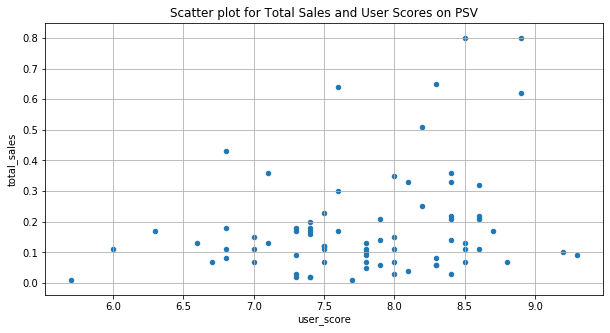

Correlation coefficient between user_score and total_sales: 0.26547827205094254


In [61]:
# Scatter Plot for user scores and total sales
df_psv.plot(x='user_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and User Scores on PSV')
plt.show()

print("Correlation coefficient between user_score and total_sales:", df_psv['user_score'].corr(df_psv['total_sales']))

#### Conclusion

The PSV has very low correlations between Critic Scores and total sales and also between User Scores and total sales. Both correlation coefficients are similar (ca. 0.26)

<a id="3.7"></a>

### 3.7) Reviews affecting Sales on other Platforms

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

#### PC

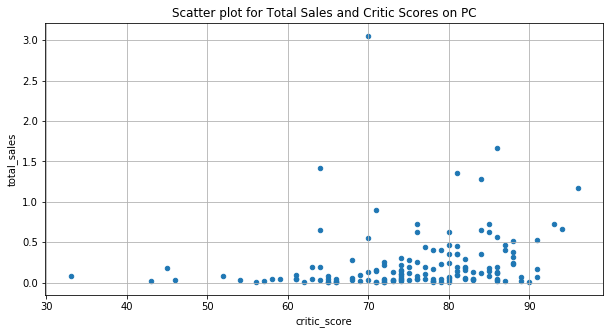

Correlation coefficient between critic_score and total_sales: 0.19412407903472953


In [62]:
df_pc = df_sorted.query('platform == "PC" and user_score == user_score and critic_score == critic_score')

# Scatter Plot for critic scores and total sales
df_pc.plot(x='critic_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and Critic Scores on PC')
plt.show()

print("Correlation coefficient between critic_score and total_sales:", df_pc['critic_score'].corr(df_pc['total_sales']))

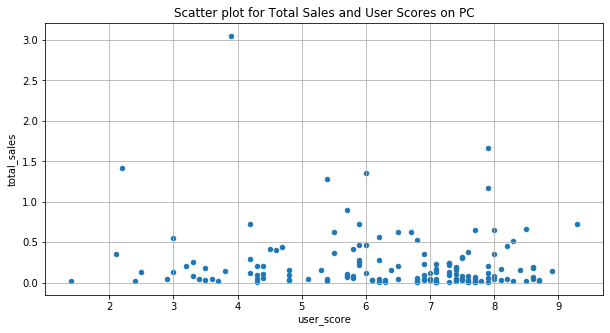

Correlation coefficient between user_score and total_sales: -0.10923502736171772


In [63]:
# Scatter Plot for user scores and total sales
df_pc.plot(x='user_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and User Scores on PC')
plt.show()

print("Correlation coefficient between user_score and total_sales:", df_pc['user_score'].corr(df_pc['total_sales']))

#### PS4

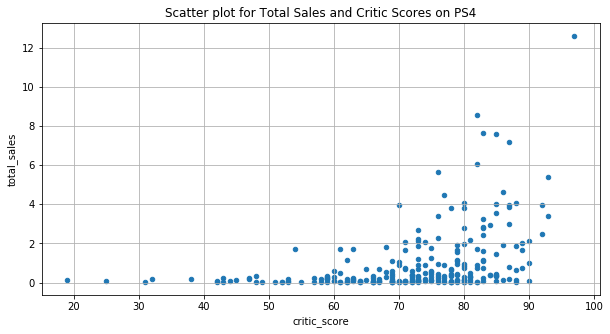

Correlation coefficient between critic_score and total_sales: 0.40589480145836676


In [64]:
df_ps4 = df_sorted.query('platform == "PS4" and user_score == user_score and critic_score == critic_score')

# Scatter Plot for critic scores and total sales
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and Critic Scores on PS4')
plt.show()

print("Correlation coefficient between critic_score and total_sales:", df_ps4['critic_score'].corr(df_ps4['total_sales']))

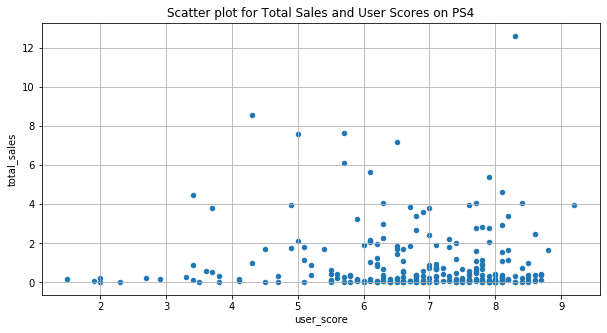

Correlation coefficient between user_score and total_sales: -0.03362497596528879


In [65]:
# Scatter Plot for user scores and total sales
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and User Scores on PS4')
plt.show()

print("Correlation coefficient between user_score and total_sales:", df_ps4['user_score'].corr(df_ps4['total_sales']))

#### XOne

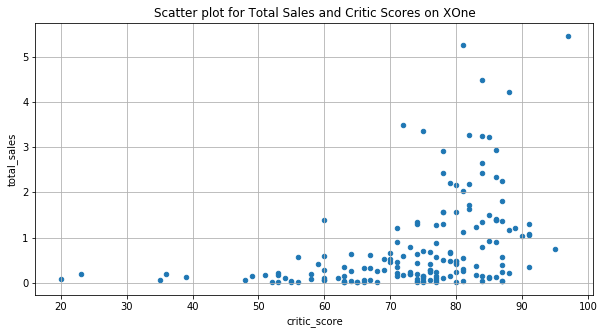

Correlation coefficient between critic_score and total_sales: 0.41042203561296403


In [66]:
df_xone = df_sorted.query('platform == "XOne" and user_score == user_score and critic_score == critic_score')

# Scatter Plot for critic scores and total sales
df_xone.plot(x='critic_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and Critic Scores on XOne')
plt.show()

print("Correlation coefficient between critic_score and total_sales:", df_xone['critic_score'].corr(df_xone['total_sales']))

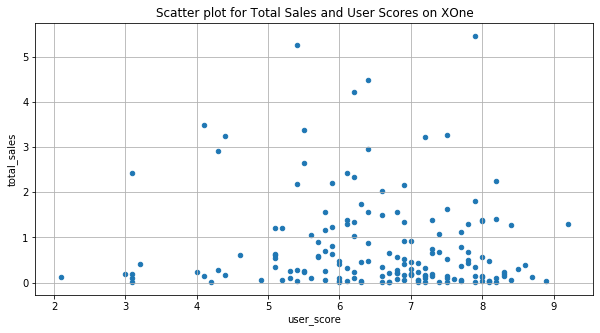

Correlation coefficient between user_score and total_sales: -0.09400318326920863


In [67]:
# Scatter Plot for user scores and total sales
df_xone.plot(x='user_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and User Scores on XOne')
plt.show()

print("Correlation coefficient between user_score and total_sales:", df_xone['user_score'].corr(df_xone['total_sales']))

#### 3DS

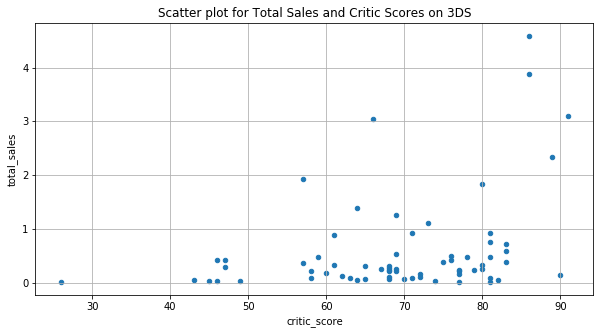

Correlation coefficient between critic_score and total_sales: 0.3392349287853147


In [68]:
df_3ds = df_sorted.query('platform == "3DS" and user_score == user_score and critic_score == critic_score')

# Scatter Plot for critic scores and total sales
df_3ds.plot(x='critic_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and Critic Scores on 3DS')
plt.show()

print("Correlation coefficient between critic_score and total_sales:", df_3ds['critic_score'].corr(df_3ds['total_sales']))

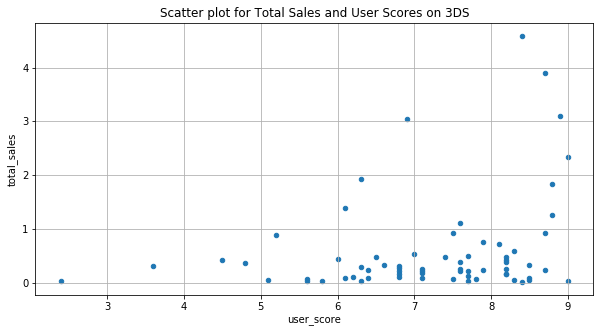

Correlation coefficient between user_score and total_sales: 0.2729904366942444


In [69]:
# Scatter Plot for critic scores and total sales
df_3ds.plot(x='user_score', y='total_sales', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for Total Sales and User Scores on 3DS')
plt.show()

print("Correlation coefficient between user_score and total_sales:", df_3ds['user_score'].corr(df_3ds['total_sales']))

#### Conclusion

Correlation coefficients: <br> <br> PSV: <br> Critic Scores - Total Sales: 0.25 <br> User Scores - Total Sales: 0.27 <br>
PS4: <br> Critic Scores - Total Sales: 0.41 <br> User Scores - Total Sales: -0.03 <br>
PC: <br> Critic Scores - Total Sales: 0.19 <br> User Scores - Total Sales: -0.11 <br>
XOne: <br> Critic Scores - Total Sales: 0.41 <br> User Scores - Total Sales: -0.09 <br>
3DS: <br> Critic Scores - Total Sales: 0.34 <br> User Scores - Total Sales: 0.27 <br> <br>
For the correlation between user scores and total sales, the only two platforms with a low correlation of 0.27 are PSV and 3DS; the other platforms don't have a correlation here. These 2 platforms are interestingly the only handheld consoles within the 5 platforms. <br>
For the correlation between critic scores and total sales, the PC and PSV platforms have a very low correlation of 0.19 and 0.25. The other three platforms have a low correlation here (3DS: 0.34, PS4: 0.41, XOne: 0.41). <br>
One can see that critic scores always correlate with the total sales, but only very low or low. The user scores don't correlate for stationary consoles but low for handheld consoles. It's unusual that the user scores are not a good indicator for sales since the user decide the sales with their purchase behaviours. There are obviously different rating criteria between professional and nonprofessional evaluators. It also seems like that the professional ones do have more reliable criteria since there is always an correlation. The correlations are dictated by many good rated games that have very low sales; that means that not every good game is popular or well known; it seems like that only certain games have much advertisements. 

<a id="3.8"></a>

### 3.8) Genres and Sales

Take a look at the general distribution of games by genre. <br> What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [70]:
print(df_sorted['genre'].unique())

['Action' 'Shooter' 'Role-Playing' 'Misc' 'Sports' 'Fighting' 'Racing'
 'Simulation' 'Platform' 'Strategy' 'Adventure' 'Puzzle']


In [71]:
# create pivot table for grouping the number of games and the sum of total sales for every genre

df_genre = df_sorted.pivot_table(index='genre', values='total_sales', aggfunc = ['count', 'sum'])
df_genre.columns = ['number_of_games', 'sum_total_sales']
df_genre

,number_of_games,sum_total_sales
genre,,
Action,766,321.87
Adventure,245,23.64
Fighting,80,35.31
Misc,155,62.82
Platform,74,42.63
Puzzle,17,3.17
Racing,85,39.89
Role-Playing,292,145.89
Shooter,187,232.98


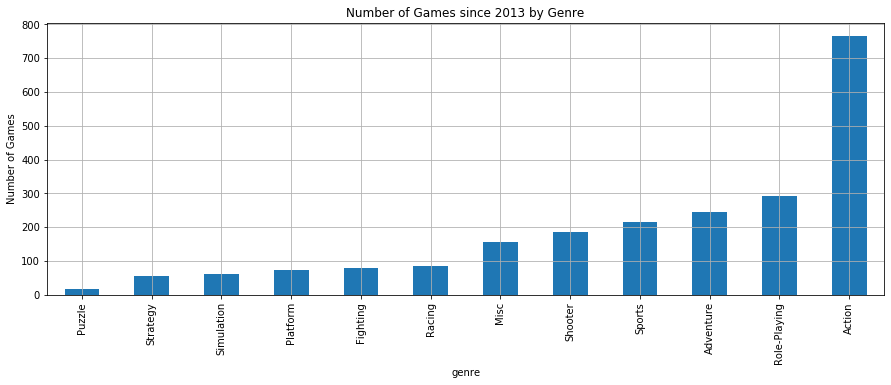

In [72]:
df_genre['number_of_games'].sort_values().plot(kind='bar', grid = True, figsize = (15, 5))
plt.ylabel('Number of Games')
plt.title('Number of Games since 2013 by Genre')
plt.show()

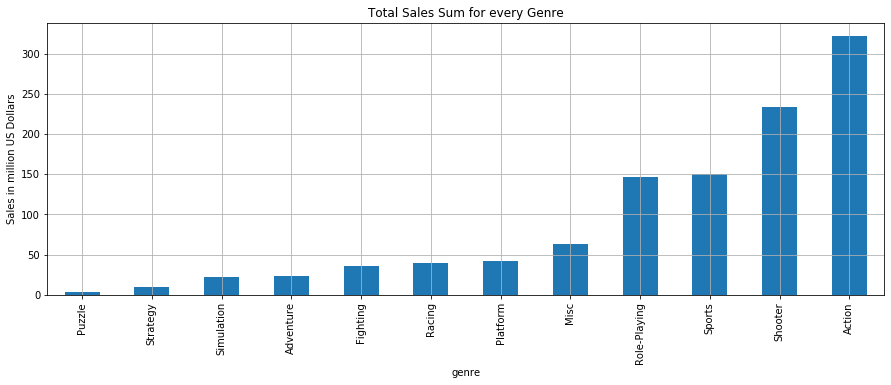

In [73]:
df_genre['sum_total_sales'].sort_values().plot(kind='bar', grid = True, figsize = (15, 5))
plt.ylabel('Sales in million US Dollars')
plt.title('Total Sales Sum for every Genre')
plt.show()

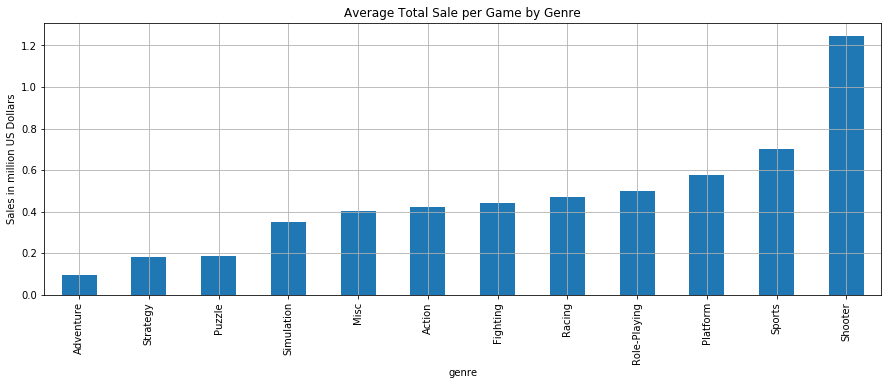

In [74]:
df_genre['average_total_sale_per_game'] = df_genre['sum_total_sales'] / df_genre['number_of_games']

df_genre['average_total_sale_per_game'].sort_values().plot(kind='bar', grid = True, figsize = (15, 5))
plt.ylabel('Sales in million US Dollars')
plt.title('Average Total Sale per Game by Genre')
plt.show()

#### Conclusion

The number of games and the total sales have a clear dependency on their genre. <br>
When looking at the total sales, we find overall three groups since there are two strong increases: Between misc and role-playing and between sports and shooter. The number of games has a clear dependency on genre and a giant increase to the genre with the most games: Action (more than twice many games than the second largest). It is intersting that - even though the number of action games is extremly high - the total sales are leaded by action games, but only have a small distance to shooter games. That means that in average every shooter game brings in above-average revenue as one can see in the top one in the third bar chart. The average revenue per genre has the genre shooters clearly on top one. We do have so many action games, but in average every action game has a revenue smaller than many other genres.

<a id="4"></a>

## 4) Create a user profile for each region

<a id="4.1"></a>

### 4.1) The top five platforms

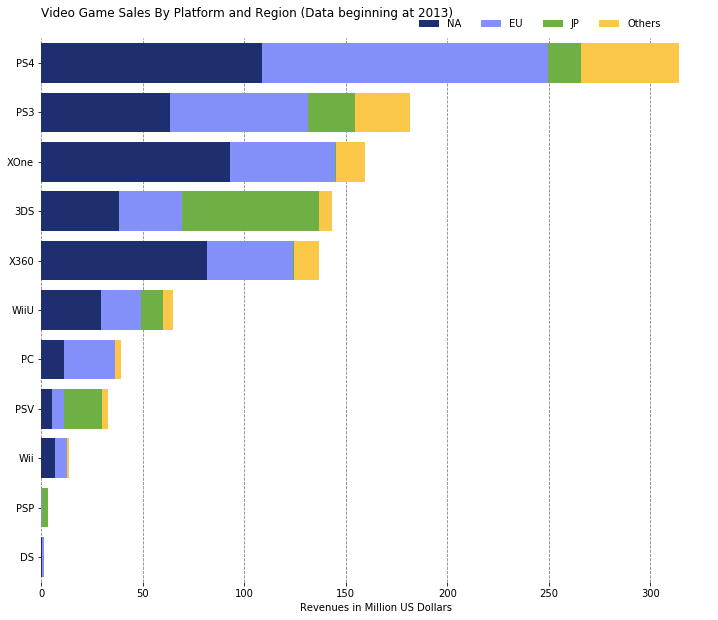

In [75]:
### As shown in section 3.2.1) but this time with data beginning at 2013

df_grouped = df_sorted.groupby('platform')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

df_grouped = df_grouped.sort_values('total_sales')

fields = ['na_sales','eu_sales','jp_sales','other_sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']


# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))


# plot bars
left = len(df_grouped) * [0]

for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]

    
# title, legend, labels
plt.title('Video Game Sales By Platform and Region (Data beginning at 2013)\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Revenues in Million US Dollars')


# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [76]:
df_grouped

,eu_sales,na_sales,jp_sales,other_sales,total_sales
platform,,,,,
DS,0.85,0.57,0.00,0.12,1.54
PSP,0.17,0.00,3.29,0.04,3.50
Wii,5.93,6.56,0.05,1.12,13.66
PSV,6.10,5.04,18.59,3.26,32.99
PC,25.36,11.11,0.00,2.96,39.43
WiiU,19.85,29.21,10.88,4.69,64.63
X360,42.52,81.66,0.51,12.11,136.80
3DS,30.96,38.20,67.81,6.28,143.25
XOne,51.59,93.12,0.34,14.27,159.32


In [77]:
print("The graphic shows the market shares for every region.")
print("Regarding the graphic, the top five platforms are:")
print()
print("For NA:")
print("PS4, XOne, X360, PS3, 3DS")
print()
print("For EU:")
print("PS4, PS3, XOne, X360, 3DS")
print()
print("For JP:")
print("3DS, PS3, PSV, PS4, WiiU")

The graphic shows the market shares for every region.
Regarding the graphic, the top five platforms are:

For NA:
PS4, XOne, X360, PS3, 3DS

For EU:
PS4, PS3, XOne, X360, 3DS

For JP:
3DS, PS3, PSV, PS4, WiiU


#### Conclusion

Between Europe and North America, there is no difference between the top five platforms with the most revenue. The XOne has not a big market share, but more than the half of it is determined by NA market share. The contrast to Japan is bigger: The market shares show other platforms being popular: PS4, PS3 and 3DS have all three regions in common, but the differences are handheld consoles. It seems like in Japan this kind of gaming is much more popular (JP Sales of 3DS is much bigger than of PS3, which is the 2nd biggest in JP). Japan has the bigest quote of consoles from the brand 'Nintendo' which is also a japan brand in the top five. In generell, the companys Microsoft with X360 and XOne and Sony with PS3 and PS4 have a big market share.

<a id="4.2"></a>

### 4.2) The top five genres

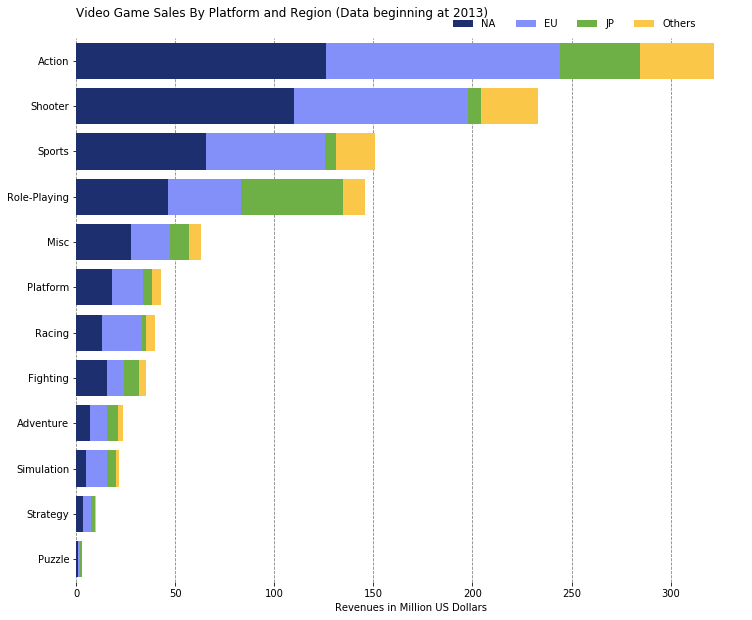

In [78]:
df_grouped = df_sorted.groupby('genre')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

df_grouped = df_grouped.sort_values('total_sales')


fields = ['na_sales','eu_sales','jp_sales','other_sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']


# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))


# plot bars
left = len(df_grouped) * [0]

for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]

    
# title, legend, labels
plt.title('Video Game Sales By Platform and Region (Data beginning at 2013)\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Revenues in Million US Dollars')


# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [79]:
df_grouped

,eu_sales,na_sales,jp_sales,other_sales,total_sales
genre,,,,,
Puzzle,1.00,0.83,1.18,0.16,3.17
Strategy,4.22,3.28,1.77,0.81,10.08
Simulation,10.92,4.86,4.52,1.46,21.76
Adventure,8.25,7.14,5.82,2.43,23.64
Fighting,8.55,15.55,7.65,3.56,35.31
Racing,20.19,12.96,2.30,4.44,39.89
Platform,15.58,18.14,4.79,4.12,42.63
Misc,20.04,27.49,9.20,6.09,62.82
Role-Playing,36.97,46.40,51.04,11.48,145.89


In [80]:
print("The graphic shows the market shares for every region.")
print("Regarding the graphic, the top five genres are:")
print()
print("For NA:")
print("Action, Shooter, Sports, Role-Playing, Misc")
print()
print("For EU:")
print("Action, Shooter, Sports, Role-Playing, Racing")
print()
print("For JP:")
print("Role-Playing, Action, Misc, Fighting, Shooter")

The graphic shows the market shares for every region.
Regarding the graphic, the top five genres are:

For NA:
Action, Shooter, Sports, Role-Playing, Misc

For EU:
Action, Shooter, Sports, Role-Playing, Racing

For JP:
Role-Playing, Action, Misc, Fighting, Shooter


#### Conclusion

The most popular genres have not a big variety in NA and EU. Action, Shooter and Role-Playing is for every region in the top five genres. Japan is the only region where Fighting games are in the top five genres. Racing is the only top five genre for EU. When looking at the JP sales, one can see that the market there is strongly dominated by Role-Playing and Action games.

<a id="4.3"></a>

### 4.3) Do ESRB ratings affect sales in individual regions?

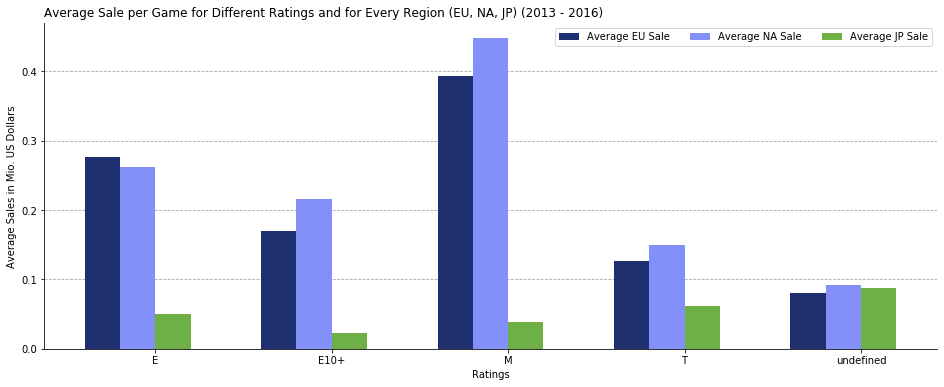

In [81]:
##### plot bar charts for every region


# pivot tables for getting the mean sale and count the sales for every rating
df_rating_eu = df_sorted.pivot_table(index = 'rating', values = 'eu_sales', \
                                       aggfunc = ['count', 'mean'])
df_rating_na = df_sorted.pivot_table(index = 'rating', values = 'na_sales', \
                                       aggfunc = ['count', 'mean'])
df_rating_jp = df_sorted.pivot_table(index = 'rating', values = 'jp_sales', \
                                       aggfunc = ['count', 'mean'])

# rename columns
df_rating_eu.columns = ['Number of Games', 'Average EU Sale (in Mio. USD)']
df_rating_na.columns = ['Number of Games', 'Average NA Sale (in Mio. USD)']
df_rating_jp.columns = ['Number of Games', 'Average JP Sale (in Mio. USD)']


# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))

# numericals
x = np.arange(0, len(df_rating_eu.index))

# plot bars
plt.bar(x - 0.3, df_rating_eu['Average EU Sale (in Mio. USD)'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_rating_na['Average NA Sale (in Mio. USD)'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_rating_jp['Average JP Sale (in Mio. USD)'], width = 0.2, color = '#6EAF46')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Average Sales in Mio. US Dollars')
plt.xlabel('Ratings')
plt.xticks(x, df_rating_eu.index)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# title and legend
plt.title('Average Sale per Game for Different Ratings and for Every Region (EU, NA, JP) (2013 - 2016)', loc ='left')
plt.legend(['Average EU Sale', 'Average NA Sale', 'Average JP Sale'], loc='upper right', ncol = 4)
plt.show()

In [82]:
df_rating_eu

,Number of Games,Average EU Sale (in Mio. USD)
rating,,
E,302,0.276026
E10+,252,0.169405
M,369,0.393821
T,333,0.125976
undefined,977,0.080768


In [83]:
df_rating_na

,Number of Games,Average NA Sale (in Mio. USD)
rating,,
E,302,0.261755
E10+,252,0.215238
M,369,0.447724
T,333,0.149520
undefined,977,0.091525


In [84]:
df_rating_jp

,Number of Games,Average JP Sale (in Mio. USD)
rating,,
E,302,0.050132
E10+,252,0.023373
M,369,0.038238
T,333,0.061832
undefined,977,0.087052


#### Conclusion

The four ratings E, E10+, M and T have enough games for valid inferences. <br>
The biggest difference in average sales within the four ratings are (units of million US dollars): <br>
for NA: 'M' (0.4477), 'T' (0.1495), percentage of increase: 200% <br>
for JP: 'T' (0.0618), 'E10+' (0.0234), percentage of increase: 164% <br>
for EU: 'M' (0.3938), 'T' (0.126), percentage of increase: 213% <br>
These three percentages tell us that the differences in sales by ratings are given for every region and vary between 164% and 213%. The 'M' rating correlates with the biggest average sales in EU and in NA, but in JP it is the 'T' rating that has the biggest average sales. Interestingly, the 'T' rating ist the one with the smallest average sale in NA and EU. Overall, there are significant impacts of the ratings to the sales in different regions, this impact differs in its intensity and in ratings within these three regions. The average sale for undefined ratings vary small betwen 0.081 in EU and 0.091 in NA. Interestingly, the undefined average sale in JP is bigger than the ones for the defined sales and is the smallest one for EU and NA ratings. This means that the games with very low sales in EU and NA have more often no ratings. At the same time, these are the games with the highest average sale in JP.

<a id="5"></a>

## 5) Test of Hypotheses

<a id="5.1"></a>

### 5.1) Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.

#### Prepare the Data

In [85]:
df_user_xone = df_sorted.query('platform == "XOne" and user_score == user_score')
df_user_pc = df_sorted.query('platform == "PC" and user_score == user_score')

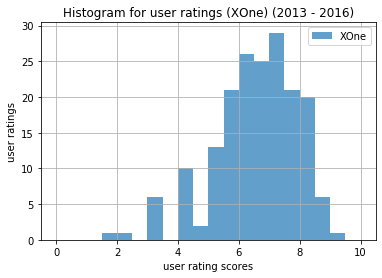

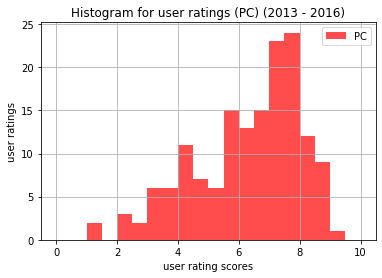

In [86]:
# Histogram for XOne

df_user_xone['user_score'] \
.hist(bins = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10], alpha = 0.7, label='XOne')
plt.title('Histogram for user ratings (XOne) (2013 - 2016)')
plt.xlabel('user rating scores')
plt.ylabel('user ratings')
plt.legend(loc='best')
plt.show()


# Histogram for PC

df_user_pc['user_score'] \
.hist(bins=[0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],alpha=0.7,label='PC',color='red')
plt.title('Histogram for user ratings (PC) (2013 - 2016)')
plt.xlabel('user rating scores')
plt.ylabel('user ratings')
plt.legend(loc='best')
plt.show()

#### Test of Hypothesis 1

Average user ratings of the Xbox One and PC platforms are the same.

###### Check the equality of samples

In [87]:
print("#### Infos about samples")
print()
print("Size of PC sample:", len(df_user_pc))
print("Size of XOne sample:", len(df_user_xone))
print()
print("User rating mean value for PC: {:.1f}".format(df_user_pc['user_score'].mean()))
print("User rating mean value for XOne: {:.1f}".format(df_user_xone['user_score'].mean()))
print()
print("User rating variance for PC: {:.1f}".format(df_user_pc['user_score'].std()**2))
print("User rating variance for XOne: {:.1f}".format(df_user_xone['user_score'].std()**2))
print()
print()
print("#### Check equality of variances")
print()
print("As one can see in the histograms above, we have significant deviations from normal distributions for user scores.")
print("The distributions are left skewed, so, we use the Levene's test for checking equality of variances.")
print()
print("Null hypothesis: Both samples are from populations with equal variances.")
print("Alternative hypothesis: Both samples are from populations with unequal variances.")
print()
print("Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.")
print()

alpha = 0.05
stat, p_value_levene = levene(df_user_pc['user_score'], df_user_xone['user_score'], center = 'median')

print('p-value from levene test: ', p_value_levene)
print()

if (p_value_levene < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.")
print()
print("So for the statistical test we can assume unequal variances.")

#### Infos about samples

Size of PC sample: 155
Size of XOne sample: 182

User rating mean value for PC: 6.3
User rating mean value for XOne: 6.5

User rating variance for PC: 3.0
User rating variance for XOne: 1.9


#### Check equality of variances

As one can see in the histograms above, we have significant deviations from normal distributions for user scores.
The distributions are left skewed, so, we use the Levene's test for checking equality of variances.

Null hypothesis: Both samples are from populations with equal variances.
Alternative hypothesis: Both samples are from populations with unequal variances.

Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.

p-value from levene test:  0.003897553110130418

We reject the null hypothesis.

So for the statistical test we can assume unequal variances.


###### Test of hypothesis

In [88]:
print("We use the students T-test since we have two independent samples of score with skewed distributions and since we")
print("have a hypothesis corresponding to the equality of sample means.")
print()
print("We bring the samples in the same size.")
print()

df_user_xone_sample = df_user_xone.sample(n = len(df_user_pc))

print("Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.")
print("Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.")
print()
print("Critical statistical significance level: alpha = 1%; if the p-value is less than alpha, we reject the null hypothesis.")
print()

alpha = 0.01
results = st.ttest_ind(df_user_xone_sample['user_score'], df_user_pc['user_score'], equal_var = False)   
    
print('p-value from student T-test: ', results.pvalue)
print()

if (results.pvalue < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.")

We use the students T-test since we have two independent samples of score with skewed distributions and since we
have a hypothesis corresponding to the equality of sample means.

We bring the samples in the same size.

Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.

Critical statistical significance level: alpha = 1%; if the p-value is less than alpha, we reject the null hypothesis.

p-value from student T-test:  0.09896474133810838

We can't reject the null hypothesis.


#### Conclusion

Both distributions for PC and XOne user ratings we saw in the histograms have deviations from normal distributions; they are left skewed. We have very similar mean score values (PC: 6.3, XOne: 6.5) but different variances (PC: 3.0, XOne: 1.9). That's why I used the Levene's test for checking the equality of variances of the samples which rejected the hypothesis of equal variances. Then I used the Student T test for checking the equality of the two population means. For that, I adapted the bigger sample to the same size as the smaller sample, that means both samples now have 155 score values. I chose the significance level of 1% since the calculated mean values are very similar in contrast to the variances and I wanted to test if the hypothesis test permits similar mean values with different widths in the distributions to be the same. If the null hypothesis would be rejected, it would have been definitely significant. The null hypothesis can't be rejected, so the hypothesis of equal means for PC and XOne user scores can be assumed.

<a id="5.2"></a>

### 5.2) Hypothesis 2: Average user ratings for the Action and Sports genres are different.

#### Prepare the Data

In [89]:
df_user_action = df_sorted.query('genre == "Action" and user_score == user_score')
df_user_sports = df_sorted.query('genre == "Sports" and user_score == user_score')

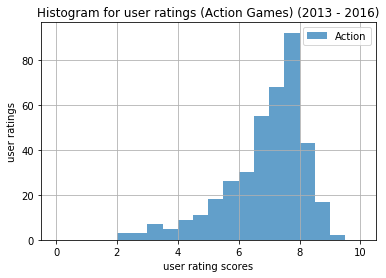

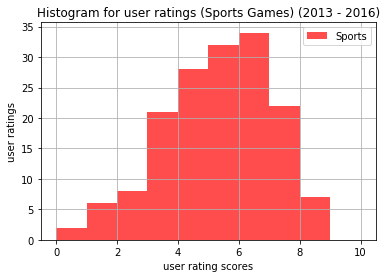

In [90]:
# Histogram for Action games

df_user_action['user_score'] \
.hist(bins = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10], alpha = 0.7, label='Action')
plt.title('Histogram for user ratings (Action Games) (2013 - 2016)')
plt.xlabel('user rating scores')
plt.ylabel('user ratings')
plt.legend(loc='best')
plt.show()

# Histogram for Sports games

df_user_sports['user_score'] \
.hist(bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], alpha = 0.7, label='Sports',color = 'red')
plt.title('Histogram for user ratings (Sports Games) (2013 - 2016)')
plt.xlabel('user rating scores')
plt.ylabel('user ratings')
plt.legend(loc='best')
plt.show()

#### Test of Hypothesis 2

Average user ratings for the Action and Sports genres are different.

###### Test of equality of variances

In [91]:
print("#### Infos about samples")
print()
print("Size of Action sample:", len(df_user_action))
print("Size of Sports sample:", len(df_user_sports))
print()
print("User rating mean value for Action games: {:.1f}".format(df_user_action['user_score'].mean()))
print("User rating mean value for Sports games: {:.1f}".format(df_user_sports['user_score'].mean()))
print()
print("User rating variance for Action games: {:.1f}".format(df_user_action['user_score'].std()**2))
print("User rating variance for Sports games: {:.1f}".format(df_user_sports['user_score'].std()**2))
print()
print()
print("#### Check equality of variances")
print()
print("As one can see in the histograms above, we have significant deviations from normal distributions for user scores.")
print("The distribution of Action games is left skewed and the distribution of sports games is unsymmetrical, so, we use the")
print("Levene's test for checking equality of variances.")
print()
print("Null hypothesis: Both samples are from populations with equal variances.")
print("Alternative hypothesis: Both samples are from populations with unequal variances.")
print()
print("Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.")
print()

alpha = 0.05
stat, p_value_levene = levene(df_user_action['user_score'], df_user_sports['user_score'], center = 'median')

print('p-value from levene test: ', p_value_levene)
print()

if (p_value_levene < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.")
print()
print("So for the statistical test we can assume unequal variances.")

#### Infos about samples

Size of Action sample: 389
Size of Sports sample: 160

User rating mean value for Action games: 6.8
User rating mean value for Sports games: 5.2

User rating variance for Action games: 1.8
User rating variance for Sports games: 3.2


#### Check equality of variances

As one can see in the histograms above, we have significant deviations from normal distributions for user scores.
The distribution of Action games is left skewed and the distribution of sports games is unsymmetrical, so, we use the
Levene's test for checking equality of variances.

Null hypothesis: Both samples are from populations with equal variances.
Alternative hypothesis: Both samples are from populations with unequal variances.

Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.

p-value from levene test:  4.2566688218274047e-07

We reject the null hypothesis.

So for the statistical test we can assume unequal variances.


###### Test of hypothesis 2

In [92]:
print("We use the students T-test since we have two independent samples of score with skewed resp. unsymmetrical")
print("distributions and since we again have a hypothesis corresponding to the equality of sample means.")
print()
print("We bring the samples in the same size.")
print()

df_user_action_sample = df_user_action.sample(n = len(df_user_sports))

print("Null hypothesis: Average user ratings of Action games and Sports games are the same.")
print("Alternative hypothesis: Average user ratings of Action games and Sports games are not the same.")
print()
print("Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.")
print()

alpha = 0.05
results = st.ttest_ind(df_user_action_sample['user_score'], df_user_sports['user_score'], equal_var = False)   
    
print('p-value from student T-test: ', results.pvalue)
print()

if (results.pvalue < alpha):
        print("We reject the null hypothesis.")
else:
        print("We can't reject the null hypothesis.")

We use the students T-test since we have two independent samples of score with skewed resp. unsymmetrical
distributions and since we again have a hypothesis corresponding to the equality of sample means.

We bring the samples in the same size.

Null hypothesis: Average user ratings of Action games and Sports games are the same.
Alternative hypothesis: Average user ratings of Action games and Sports games are not the same.

Critical statistical significance level: alpha = 5%; if the p-value is less than alpha, we reject the null hypothesis.

p-value from student T-test:  3.3212625882136364e-17

We reject the null hypothesis.


### Conclusion

Average user ratings for the Action and Sports genres are different; after that test we can't really give an acurate answer to that hypothesis, what we can say is that its opposite statement 'Average user ratings for the Action and Sports genres are the same' must be rejected after the Student T Test by a significance level of 5%. Before testing, we again used the Levene's test for checking the equality of both variances; this equality was rejected by this test. We also had adapted the same sample size for both platforms (160 ratings). We can see that the p value is very small, so this rejection is really significant. The both average ratings are not the same, but it depends to what extent the word 'different' is supposed to be. The mean values (Action: 6.8, Sports: 5.2) are not so similar on the first sight just as their variances (Action: 1.8, Sports: 3.2) as well. The significant level was chosen with 5% because these calculated values and the different distributions seen on the histograms had already indicated that the mean values are not equal; so there was no need to set a smaller significance level.

<a id="6"></a>

## 6) General Conclusion

In chapter 3.1 we have observed a decreasing trend for released games from 2015 to 2016. The four platforms with the biggest absolute total sales currently (PS2, PS3, Wii, XBOX360) all have decreasing trends for their total sales in the last years. <br> <br> 
The follower of the PS3, the PS4 has by far the biggest total sale in 2016 compared to other platforms. In the user profiles, the PS4 is in the top five platforms for all regions (JP, EU and NA). <br> The PSV platform is the only platform that has decelerated its decreasing trend from 2015/16 compared to 2014/15 in total sales; at the same time it is the third biggest platform in total game releases in 2016. In the japanese market there is a better trend for the PSV estimated in 2017 since the user profile for japan shows the preference for handheld platforms that can be played outside. In order to get more informations for the PSV and also in generell, the statements according user and critic ratings could be more precise with more real data according to these ratings. Also the 3DS platform is a handheld and, besides the most popular games on 3DS, there are other popular games for 3DS with much higher total sales in Japan than in other regions; so the 3DS has for Japan also chances in 2017. <br> The XBox One has the second largest amount of new game releases and of total sale in 2016. The XBox One is in the same platform generation as the PS4; both came out in 2013. The XBox One also decelerated its decreasing trend in total sales. <br> Also the PC platform is always an interesting platform since it's the only platform that exists since the 80s' until today. That can be seen in the trend for game releases where the only platform increasing its trend in game releases from 2014/15 to 2015/16 was the PC. We found out that statistically significant the user ratings for PC and XBox One games are in average the same. Since these two platforms are increasing their trends in game releases in the last years the observations promise a steady consistency for the XOne and the PC in 2017. <br> For the XBox One it's important to focus more on good games in 2017 since we found out that the correlation between total sales and critic ratings is moderate for XBox One and the biggest correlation compared to the PSV, 3DS and PC platform; the correlation is the same for PS4 and XOne. Comparing PS4 and XOne platforms, I predict a higher total sale for PS4 in 2017 since the game with the highest total sale for both platforms is the same game an the PS4 has a total sale which is bigger than twice the one for XOne. <br> <br> For all platforms it is important to know that there is one genre that has a above-average total sale per game: Shooter games (approx. 1.2 Mio. USD per game). Sports games (approx. 0.7 Mio. USD per game) have the second largest total sale per game, but there are differences from region to region: While shooters games are in the top five in all regions, sports games are less popular in Japan.